<a href="https://colab.research.google.com/github/NRmethun/ML-DL-Notebook/blob/main/Audio_classification_DL_feature_extraction_attempt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
os.chdir('/content/drive/MyDrive/audio-features')
print(os.getcwd())

/content/drive/MyDrive/audio-features


In [ ]:
features = np.load('train_feature_x_batch_1.npy', allow_pickle=True)
labels = np.load('train_label_y_batch_1.npy', allow_pickle=True)
for i in range(2,91):
  file_name_x =  f'train_feature_x_batch_{i}.npy'
  file_name_y = f'train_label_y_batch_{i}.npy'
  # print("------------------------------------------------")
  # print(file_name_x)
  # print(file_name_y)
  features_new =  np.load(file_name_x, allow_pickle=True)
  lebels_new = np.load(file_name_y, allow_pickle=True)
  features = np.concatenate((features, features_new), axis=0)
  labels = np.concatenate((labels,lebels_new))
  print(i)
  # print("------------------------------------------------")
  del features_new
  del lebels_new

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90


In [ ]:
features.shape

(40500, 128, 300, 3)

In [ ]:
features_test = np.load('train_feature_x_batch_122.npy', allow_pickle=True)
labels_test = np.load('train_label_y_batch_122.npy', allow_pickle=True)
for i in range(122,127):
  file_name_x =  f'train_feature_x_batch_{i}.npy'
  file_name_y = f'train_label_y_batch_{i}.npy'
  print(file_name_x)
  print(file_name_y)
  features_new =  np.load(file_name_x, allow_pickle=True)
  lebels_new = np.load(file_name_y, allow_pickle=True)
  features_test = np.concatenate((features_test, features_new), axis=0)
  labels_test = np.concatenate((labels_test,lebels_new))
  print(i)
  del features_new
  del lebels_new

train_feature_x_batch_122.npy
train_label_y_batch_122.npy
122
train_feature_x_batch_123.npy
train_label_y_batch_123.npy
123
train_feature_x_batch_124.npy
train_label_y_batch_124.npy
124
train_feature_x_batch_125.npy
train_label_y_batch_125.npy
125
train_feature_x_batch_126.npy
train_label_y_batch_126.npy
126


In [ ]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Example list of categories


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Reshape the list into a 2D array
y_train = np.array(labels).reshape(-1, 1)
y_test = np.array(labels_test).reshape(-1, 1)

# Fit and transform the data using the encoder
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
# Print the one-hot encoded array
# print(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y_train.shape
y_test[11]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D ,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
# mobilnet = VGG16(input_shape=(128,300,3),
#                  weights='imagenet',
#                  #weights=None ,
#                  include_top=False)



# for layer in mobilnet.layers:
#   layer.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def vgg16_model(input_shape, num_classes):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Define input shape and number of classes
input_shape = (128,300,3)  # Adapt to your input image size
num_classes = 45  # Number of classes in your classification task

# Create the VGG16 model
model = vgg16_model(input_shape, 45)

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 300, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 300, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 150, 64)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 150, 128)      73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 150, 128)      147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 75, 128)      0         
 2D)                                                    

In [ ]:
# last_output = mobilnet.output
# from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# # Flatten the output layer to 1 dimension
# x = layers.Flatten()(last_output)
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
# x = layers.Dense(1024, activation='relu')(x)
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.3)(x)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.2)(x)
# x = layers.Dense(32, activation='relu')(x)

# # Add a final sigmoid layer for classification
# x = layers.Dense  (45, activation='softmax')(x)

# model = Model( mobilnet.input, x)

model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('saved_mode_90_own.h5', verbose=1, monitor='val_accuracy', save_best_only=True, mode='auto')

In [ ]:
history = model.fit(features, y_train, epochs=300,
                    batch_size=32,
                       callbacks=[checkpoint],
                       validation_data= (features_test, y_test))

Epoch 1/300
1266/1266 [==============================] - ETA: 0s - loss: 3.8071 - accuracy: 0.0213
Epoch 1: val_accuracy improved from -inf to 0.02196, saving model to saved_mode_90_own.h5
1266/1266 [==============================] - 79s 49ms/step - loss: 3.8071 - accuracy: 0.0213 - val_loss: 3.8066 - val_accuracy: 0.0220
Epoch 2/300
1266/1266 [==============================] - ETA: 0s - loss: 3.8068 - accuracy: 0.0219
Epoch 2: val_accuracy improved from 0.02196 to 0.02272, saving model to saved_mode_90_own.h5
1266/1266 [==============================] - 60s 48ms/step - loss: 3.8068 - accuracy: 0.0219 - val_loss: 3.8067 - val_accuracy: 0.0227
Epoch 3/300
1266/1266 [==============================] - ETA: 0s - loss: 3.8068 - accuracy: 0.0225
Epoch 3: val_accuracy did not improve from 0.02272
1266/1266 [==============================] - 57s 45ms/step - loss: 3.8068 - accuracy: 0.0225 - val_loss: 3.8067 - val_accuracy: 0.0227
Epoch 4/300
1265/1266 [============================>.] - ETA: 0s

KeyboardInterrupt: ignored

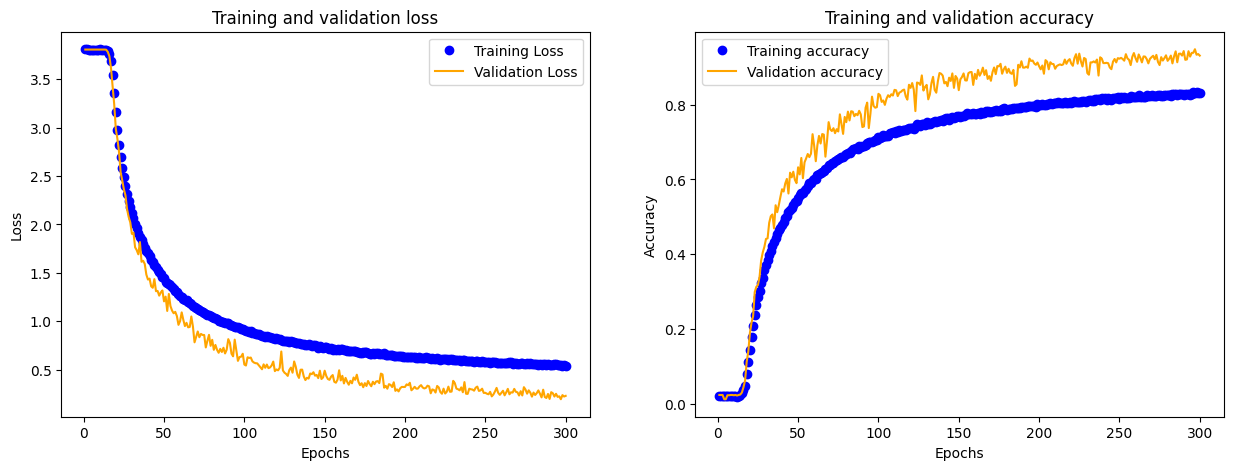

In [ ]:
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,301)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'bo',label='Training Loss')
ax1.plot(epochs,val_loss_values,'orange', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'bo', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'orange',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
model.load_weights('saved_mode_90.h5')

[INFO] Calculating model accuracy


In [ ]:
Y_pred = model.predict(features_test)


83/83 [==============================] - 2s 17ms/step


In [ ]:
Y_pred_for_conf = np.argmax(Y_pred,axis =1)
y_test_for_conf = np.argmax(y_test, axis =1)

In [ ]:
all_class = np.unique(labels_test)
all_class

array(['1', '10', '11', '12', '14', '15', '16', '17', '18', '19', '2',
       '25', '26', '27', '3', '4', '47', '48', '5', '55', '56', '57',
       '58', '6', '61', '70', '8', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95',
       '98'], dtype='<U2')

In [ ]:
classes = ['1', '10', '11', '12', '14', '15', '16', '17', '18', '19', '2',
       '25', '26', '27', '3', '4', '47', '48', '5', '55', '56', '57',
       '58', '6', '61', '70', '8', '80', '81', '82', '83', '84', '85',
       '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95',
       '98']

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_for_conf, Y_pred_for_conf, target_names=classes))

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        58
          10       0.96      0.82      0.88        60
          11       0.94      0.98      0.96        62
          12       0.95      0.97      0.96        58
          14       1.00      0.95      0.97        60
          15       0.86      0.90      0.88        60
          16       0.95      1.00      0.98        62
          17       1.00      0.95      0.97        58
          18       1.00      0.94      0.97        62
          19       0.96      0.93      0.95        58
           2       1.00      0.95      0.97        60
          25       0.97      0.95      0.96        62
          26       0.91      1.00      0.95        58
          27       0.93      0.86      0.89        59
           3       0.97      1.00      0.98        60
           4       0.98      1.00      0.99        62
          47       1.00      0.98      0.99        60
          48       1.00    

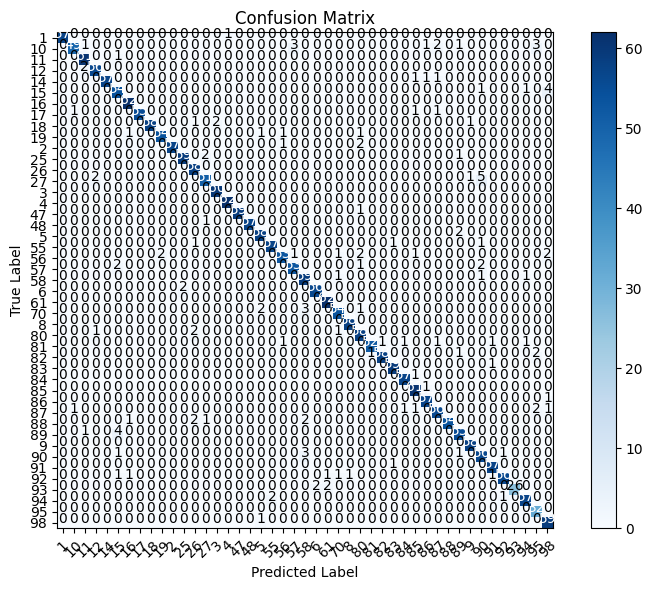

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have ground truth labels and predicted labels stored in variables
# y_true: Ground truth labels
# y_pred: Predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_test_for_conf, Y_pred_for_conf)

# Create a list of class labels


# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Normalize the confusion matrix if desired
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Format and display the actual values in the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()


In [ ]:
print(cm)

[[57  0  0 ...  0  0  0]
 [ 0 49  1 ...  0  3  0]
 [ 0  0 61 ...  0  0  0]
 ...
 [ 0  0  0 ... 57  0  0]
 [ 0  0  0 ...  0 32  0]
 [ 0  0  0 ...  0  0 59]]


In [ ]:
np.savetxt("/content/drive/MyDrive/outputs/confusion_matrix_attempt3_vgg16_90.csv", cm, delimiter=",")